# Traveling Salesman Problem
## EX12: LP with subtours

1. Try to solve the TSP with a LP matching model. Use the scipy.linprog package. For the cities coordinates use random points.
1. Plot the resulting network with the matplotlib library.
1. Understand the outputs. What happend to the optimal path?
1. What are the alternatives to this formulation and their disadvantages?

## Generate random cities

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

import matplotlib.pyplot as plt

from mis_utils import *

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.latex.repr = True

In [2]:
num_cities = 8
dist_max = 100

In [3]:
cities_location = (np.random.random_sample((num_cities, 2))*dist_max) #.astype(int)

In [4]:
node_names = np.zeros((num_cities), dtype = str) #='<S3')

In [5]:
for i in range(ord('a'), ord('a') + num_cities):
    node_names[i - ord('a')] = (chr(i))

In [6]:
node_names

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='<U1')

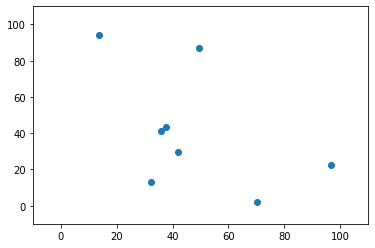

In [7]:
plt.scatter(cities_location[:, 0], cities_location[:, 1])
plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

In [8]:
# Creo la matriz NN

# Model trough Linear Programming

In [9]:
NN = np.zeros((num_cities, num_cities))
NN_w_cost = np.zeros((num_cities, num_cities))

for idx1 in range(num_cities-1):
    for idx2 in range(idx1 + 1, num_cities):
#         print(np.linalg.norm(cities_location[idx1]-cities_location[idx2]))
        NN[idx1, idx2] = 1
        NN[idx2, idx1] = 1
        
        NN_w_cost[idx1, idx2] = np.linalg.norm(cities_location[idx1]-cities_location[idx2])
        NN_w_cost[idx2, idx1] = np.linalg.norm(cities_location[idx1]-cities_location[idx2])

In [10]:
Aeq, arcs = nn2na(NN, node_names)

In [11]:
costs = get_costs(NN_w_cost, arcs)

In [12]:
nan_names = get_col_names(NN, node_names=node_names, as_numpy=True, sep = ".")

In [13]:
Aeq_final = np.zeros((Aeq.shape[0]*2, Aeq.shape[1]), dtype = int)

In [14]:
Aeq_final[0:Aeq.shape[0]] = Aeq==1
Aeq_final[Aeq.shape[0]:] = Aeq==-1

In [16]:
pd.DataFrame(NN, index=node_names, columns=node_names)

,a,b,c,d,e,f,g,h
a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
b,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
f,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
g,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [17]:
pd.DataFrame(Aeq_final, index=np.append(node_names, node_names), columns=nan_names)

,a.b,a.c,a.d,a.e,a.f,a.g,a.h,b.a,b.c,b.d,b.e,b.f,b.g,b.h,c.a,c.b,c.d,c.e,c.f,c.g,c.h,d.a,d.b,d.c,d.e,d.f,d.g,d.h,e.a,e.b,e.c,e.d,e.f,e.g,e.h,f.a,f.b,f.c,f.d,f.e,f.g,f.h,g.a,g.b,g.c,g.d,g.e,g.f,g.h,h.a,h.b,h.c,h.d,h.e,h.f,h.g
a,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
a,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
bounds = tuple([(0, 1.1) for arcs in range(0, nan_names.shape[0])])

In [19]:
beq = np.ones((node_names.shape[0]*2))

In [20]:
beq

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
resume_df = pd.DataFrame(bounds, index=nan_names, columns=['Min bound', 'Max bound'])
resume_df['Costs'] = costs
# resume_df['Max time'] = t
resume_df

,Min bound,Max bound,Costs
a.b,0,1.1,45.000846
a.c,0,1.1,47.875276
a.d,0,1.1,75.838888
a.e,0,1.1,79.864957
a.f,0,1.1,57.604039
a.g,0,1.1,36.374706
a.h,0,1.1,87.458045
b.a,0,1.1,45.000846
b.c,0,1.1,3.043440
b.d,0,1.1,30.932953


In [22]:
res_simplex = linprog(costs, A_eq=Aeq_final, b_eq=beq, bounds=bounds, method='revised simplex')

/home/diego/.virtualenvs/OS11/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


In [23]:
res_simplex.message

'Optimization terminated successfully.'

In [24]:
resume_df['Solution'] = res_simplex.x

In [25]:
resume_df

,Min bound,Max bound,Costs,Solution
a.b,0,1.1,45.000846,0.0
a.c,0,1.1,47.875276,0.0
a.d,0,1.1,75.838888,0.0
a.e,0,1.1,79.864957,0.0
a.f,0,1.1,57.604039,0.0
a.g,0,1.1,36.374706,1.0
a.h,0,1.1,87.458045,0.0
b.a,0,1.1,45.000846,0.0
b.c,0,1.1,3.043440,1.0
b.d,0,1.1,30.932953,0.0


In [26]:
paths = resume_df.Solution.index[resume_df.Solution==1]

In [27]:
named_paths = []
idx_paths = []
not_visited = np.ones(len(paths), dtype = bool)

idx_from = ord(paths[0][0]) - ord('a')

actual_subtour = []

all_subtours = []

while np.sum(not_visited) > 0:

    if not_visited[idx_from]==False:
        idx_from = np.argwhere(not_visited)[0][0]
        idx_paths.append(-1) 
        print("Visitado =>\nFrom:", idx_from)
        
        all_subtours.append(actual_subtour.copy())
        
        actual_subtour = []
    else:
        print("From:", idx_from)

    not_visited[idx_from] = False
    idx_to = ord(paths[idx_from][2]) - ord('a')
    named_paths.append([[chr(ord('a') + idx_from), chr(ord('a') + idx_to)]])
    idx_paths.append(idx_from)
    
    actual_subtour.append(idx_from)
    
    idx_from = idx_to
    
    print("To:", idx_from)
idx_paths.append(-1)
all_subtours.append(actual_subtour.copy())


From: 0
To: 6
From: 6
To: 0
Visitado =>
From: 1
To: 2
From: 2
To: 1
Visitado =>
From: 3
To: 5
From: 5
To: 3
Visitado =>
From: 4
To: 7
From: 7
To: 4


In [28]:
print("This solution has {} subtours".format(idx_paths.count(-1)))

This solution has 4 subtours


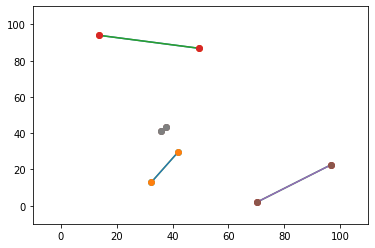

In [29]:
# idx_from = idx_paths.pop()
# idx_from = idx_paths[0]
idx_inic = idx_paths[0]
for i in range(0, len(idx_paths)-1):
    idx_from = idx_paths[i]
    idx_to = idx_paths[i+1]
    
    if idx_from == -1:
        idx_inic = idx_to
        continue

    elif idx_to == -1:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]), 'o')

    else:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')


plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

# Results
# We try to solve TSP with simplex method.
# We found that if we put all the restrictions, the complexity for TSP trough linear programming is extremmely high. It should be reduced to integer programming
# Then, we relax the problem and we get sobtours.

## What happens if we try to add restrictions iteratively, to avoid subtours?

In [30]:
all_subtours
qty_restr = len(all_subtours)
A = np.zeros((qty_restr * 2, nan_names.shape[0]))
NN_max = np.zeros((node_names.shape[0], node_names.shape[0]))
b = np.zeros(qty_restr * 2)
idx = 0
for subtour in all_subtours:
    qty_max = len(subtour)-1
    for idx_subtour in range(len(subtour)-1):

        idx_from = subtour[idx_subtour]
        idx_to = subtour[idx_subtour+1]
        
        col_name = get_col_name(idx_from, idx_to)
        idx_col = get_col_idx(col_name, nan_names)
        A[idx, idx_col] = 1

#         idx_from = subtour[idx_subtour]
#         idx_to = subtour[idx_subtour+1]
        
        col_name = get_col_name(idx_to, idx_from)
        idx_col = get_col_idx(col_name, nan_names)
        A[idx + qty_restr, idx_col] = 1
        pass
    
    idx_from = subtour[-1]
    idx_to = subtour[0]
    
    col_name = get_col_name(idx_from, idx_to)
    idx_col = get_col_idx(col_name, nan_names)
    A[idx, idx_col] = 1
    
#     idx_from = subtour[-1]
#     idx_to = subtour[0]
    
    col_name = get_col_name(idx_to, idx_from)
    idx_col = get_col_idx(col_name, nan_names)
    A[idx + qty_restr, idx_col] = 1

    b[idx] = qty_max
    b[idx + qty_restr] = qty_max
    
    idx = idx + 1


In [31]:
pd.DataFrame(A,  columns=nan_names)

,a.b,a.c,a.d,a.e,a.f,a.g,a.h,b.a,b.c,b.d,b.e,b.f,b.g,b.h,c.a,c.b,c.d,c.e,c.f,c.g,c.h,d.a,d.b,d.c,d.e,d.f,d.g,d.h,e.a,e.b,e.c,e.d,e.f,e.g,e.h,f.a,f.b,f.c,f.d,f.e,f.g,f.h,g.a,g.b,g.c,g.d,g.e,g.f,g.h,h.a,h.b,h.c,h.d,h.e,h.f,h.g
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
b

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
bounds = tuple([(0, 1) for arcs in range(0, nan_names.shape[0])])

In [34]:
res_simplex = linprog(costs, A_eq=Aeq_final, b_eq=beq, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex')

/home/diego/.virtualenvs/OS11/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


In [35]:
if (np.sum(np.abs(res_simplex.x - np.round(res_simplex.x))) != 0.0):
    print("Warning! Solution is not integer")

In [36]:
resume_df['Solution1'] = np.round(res_simplex.x)
resume_df['Solution1float'] = res_simplex.x
paths = resume_df.Solution1.index[resume_df.Solution1==1]

In [37]:
res_simplex.x

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [38]:
resume_df

,Min bound,Max bound,Costs,Solution,Solution1,Solution1float
a.b,0,1.1,45.000846,0.0,0.0,0.0
a.c,0,1.1,47.875276,0.0,0.0,0.0
a.d,0,1.1,75.838888,0.0,0.0,0.0
a.e,0,1.1,79.864957,0.0,1.0,1.0
a.f,0,1.1,57.604039,0.0,0.0,0.0
a.g,0,1.1,36.374706,1.0,0.0,0.0
a.h,0,1.1,87.458045,0.0,0.0,0.0
b.a,0,1.1,45.000846,0.0,0.0,0.0
b.c,0,1.1,3.043440,1.0,0.0,0.0
b.d,0,1.1,30.932953,0.0,0.0,0.0


In [39]:
named_paths = []
idx_paths = []
not_visited = np.ones(len(paths), dtype = bool)

idx_from = ord(paths[0][0]) - ord('a')

actual_subtour = []

all_subtours = []

while np.sum(not_visited) > 0:

    if not_visited[idx_from]==False:
        idx_from = np.argwhere(not_visited)[0][0]
        idx_paths.append(-1) 
        print("Visitado =>\nFrom:", idx_from)
        
        all_subtours.append(actual_subtour.copy())
        
        actual_subtour = []
    else:
        print("From:", idx_from)

    not_visited[idx_from] = False
    idx_to = ord(paths[idx_from][2]) - ord('a')
    named_paths.append([[chr(ord('a') + idx_from), chr(ord('a') + idx_to)]])
    idx_paths.append(idx_from)
    
    actual_subtour.append(idx_from)
    
    idx_from = idx_to
    
    print("To:", idx_from)
idx_paths.append(-1)
all_subtours.append(actual_subtour.copy())


From: 0
To: 4
From: 4
To: 7
From: 7
To: 3
From: 3
To: 5
From: 5
To: 2
From: 2
To: 1
From: 1
To: 6
From: 6
To: 0


In [40]:
idx_paths

[0, 4, 7, 3, 5, 2, 1, 6, -1]

In [41]:
# if idx_paths.index(-1) != 
# hh

In [42]:
print("This solution has {} subtours".format(idx_paths.count(-1)))

This solution has 1 subtours


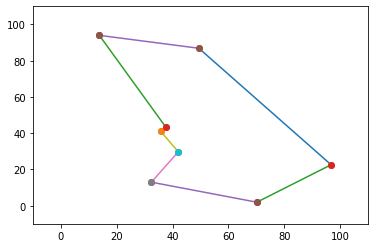

In [43]:
# idx_from = idx_paths.pop()
# idx_from = idx_paths[0]
idx_inic = idx_paths[0]
for i in range(0, len(idx_paths)-1):
    idx_from = idx_paths[i]
    idx_to = idx_paths[i+1]
    
    if idx_from == -1:
        idx_inic = idx_to
        continue

    elif idx_to == -1:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]), 'o')

    else:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')


plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

# We have some random results, this is because we relaxed the problem also and we are not using entire programming.
# By that, sometimes we obtain non integer results, that means that this solucion is not feasible.
# We can try to round results, at this case, some times we found one solution, but we cannot be sure that it is the optimal solution.
# Other times, we violates the restrictions. That is because we are approximating solutions.
## Some times, we add a restriction and when we optimize, it is not complied
## We can set upper bound to 1 or None, it doesn't change results...

# Using the simplex method for complex integer problems is not always a good decision, it depends on problems.
# If I try to add more restrictions, one for each particular case, could terminate in a problem that Simplex cannot approximate.
# TSP is a very complex problem and it need more sophisticated methods to be solved optimously
# Sometimes, it could be solved, trough various iterations, limiting each subtour in each iteration